In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\envs\PY36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
DATAFILE = os.path.join('data','data.csv')
TARGETFILE = os.path.join('data','target.csv')
OUTDIR = os.path.join('results')

In [3]:
#DA AGGIUNGERE GTARGET E TDI
train = pd.read_table(DATAFILE,sep=',')
target = pd.read_table(TARGETFILE,sep=',')
dataset = pd.concat([train,target],axis=1)

In [4]:
#Original dataset size
original_size = np.shape(dataset)[0]

#Delete rows associated with "extreme" values: Y=200 || Y = -200
dataset = dataset[dataset.Y!=-200]
dataset = dataset[dataset.Y!=200]

#New dataset size and analysis of lost data
new_size = np.shape(dataset)[0]
print('Records lost: ',(1.0-new_size/original_size)*100, '%')

#Description of the dataset
dataset.describe()

Records lost:  30.05967005967006 %


,subj,Gc,CHO,ROC,Gt,IOB,var_class,Vmx,kp3,CR,CF,BW,u2ss,Ib,min_risk,Y
count,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000,9963.000000
mean,51.591388,114.664258,74.627120,-0.333333,119.862853,1.929754,4.737730,0.070821,0.010829,16.013952,43.360333,70.012447,1.758747,106.129012,6.225203,22.048580
std,29.087193,63.364758,17.039728,1.547287,6.707839,2.457164,2.054412,0.023353,0.005171,5.238797,9.625555,12.529655,0.511385,17.855293,9.034714,85.405424
min,1.000000,60.000000,50.000000,-2.000000,107.530000,0.000000,1.000000,0.026252,0.002596,7.000000,26.000000,46.692000,0.647920,68.668000,0.772100,-190.000000
25%,25.500000,70.000000,60.000000,-2.000000,115.090000,0.025917,4.000000,0.056890,0.007041,12.000000,36.000000,60.371000,1.446300,91.455000,2.579850,-30.000000
50%,53.000000,80.000000,70.000000,-1.000000,119.790000,1.033500,5.000000,0.064676,0.010244,15.000000,43.000000,68.404000,1.681200,104.230000,3.931400,30.000000
75%,77.000000,150.000000,90.000000,1.000000,124.600000,2.957900,6.000000,0.085176,0.013947,20.000000,50.000000,76.510000,2.073500,118.920000,6.042250,80.000000
max,100.000000,250.000000,100.000000,2.000000,137.800000,16.508000,7.000000,0.142120,0.025736,30.000000,67.000000,106.090000,3.551700,161.560000,117.400000,190.000000


In [5]:
dataset['Y'].describe()

count    9963.000000
mean       22.048580
std        85.405424
min      -190.000000
25%       -30.000000
50%        30.000000
75%        80.000000
max       190.000000
Name: Y, dtype: float64

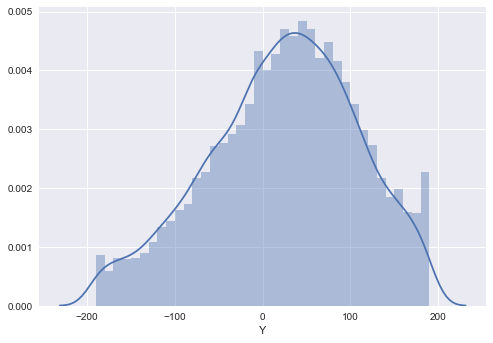

In [6]:
sns.distplot(dataset['Y'])
plt.show()

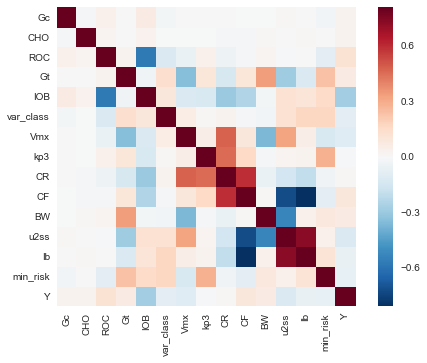

In [10]:
#correlation matrix
corrmat = dataset.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

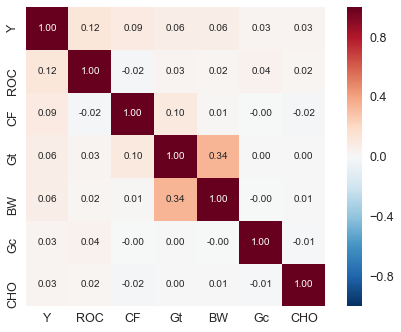

In [11]:
#Target correlation matrix
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Y')['Y'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

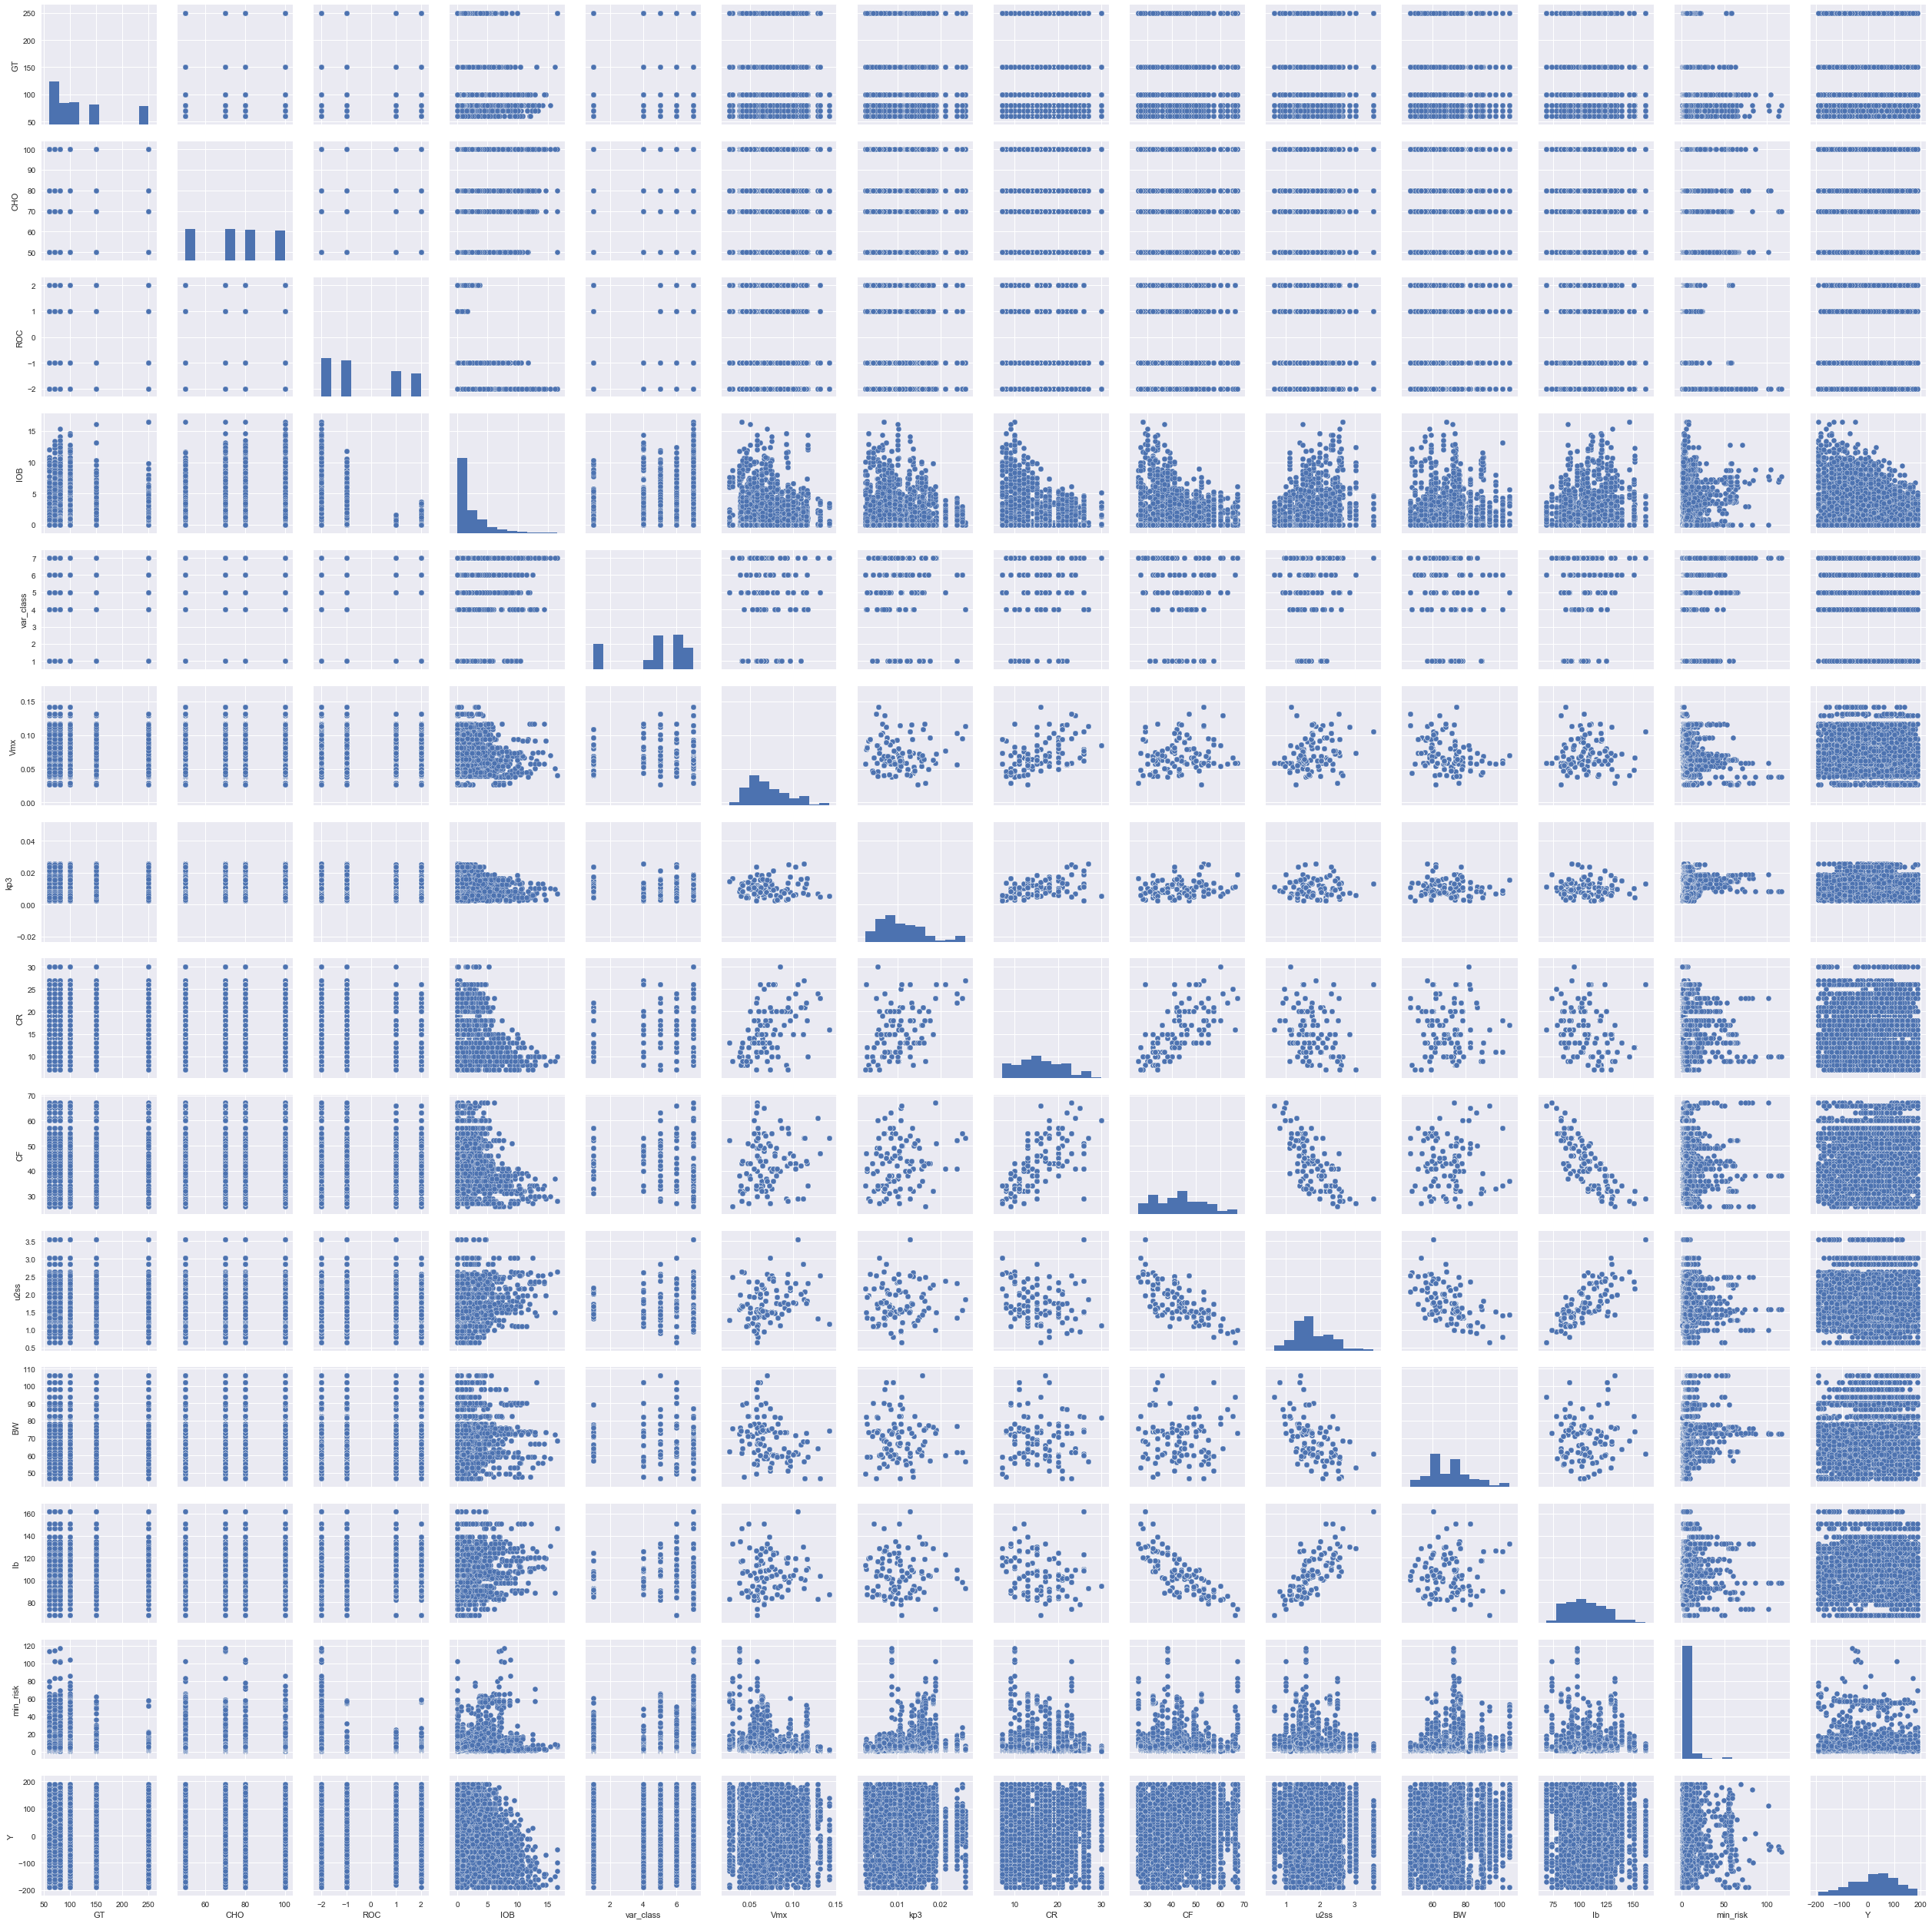

In [54]:
#scatterplot
sns.set()
sns.pairplot(dataset, size = 2.5)
plt.show();

# Variable transformation

In [7]:
dataset_trans = dataset.copy()
dataset_trans.to_csv('dataset_trans.csv',sep=',',index=False)

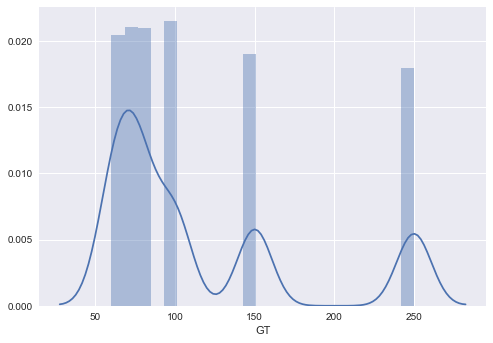

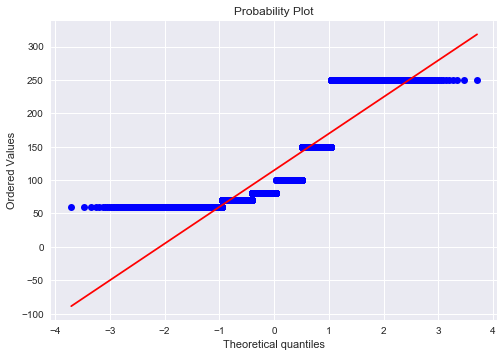

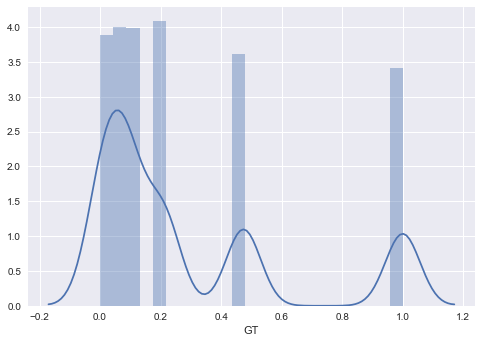

In [61]:
#GC
var = 'GT'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
scaler = MinMaxScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()

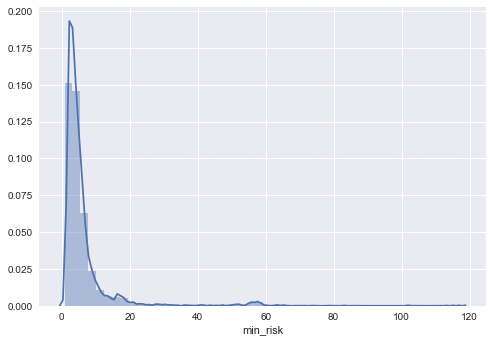

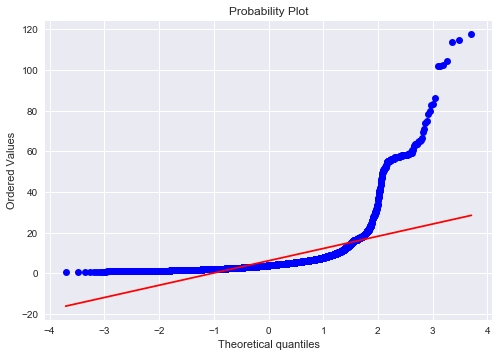

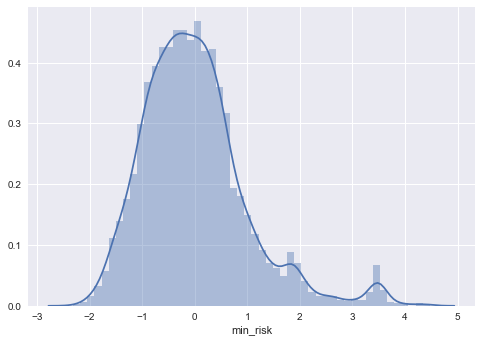

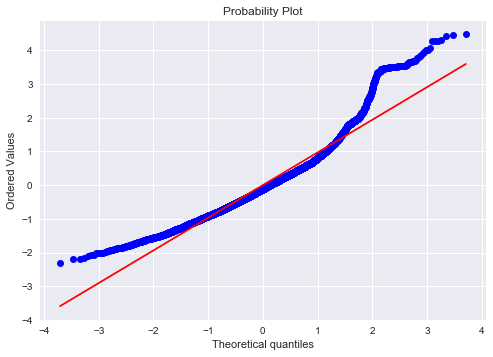

In [63]:
#min_risk
var = 'min_risk'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

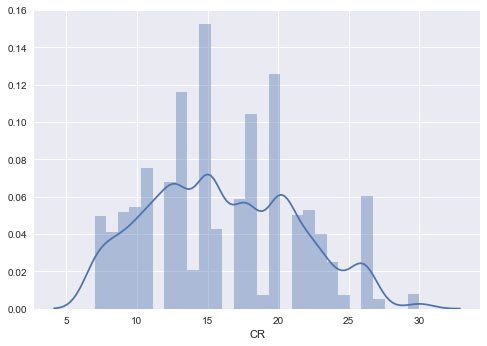

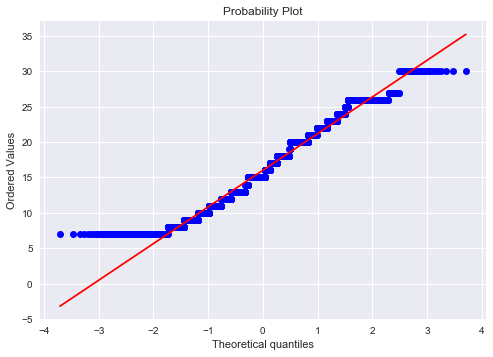

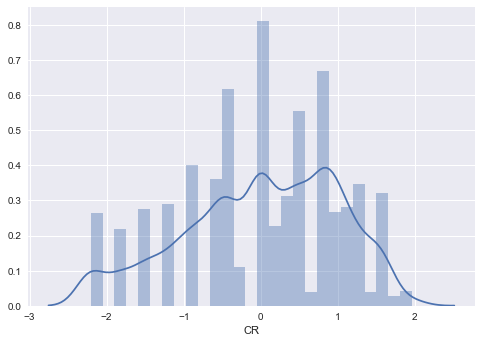

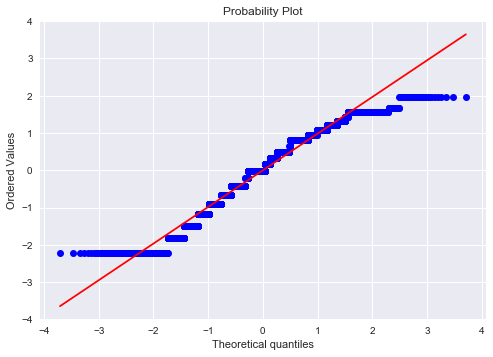

In [64]:
#CR 
var = 'CR'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

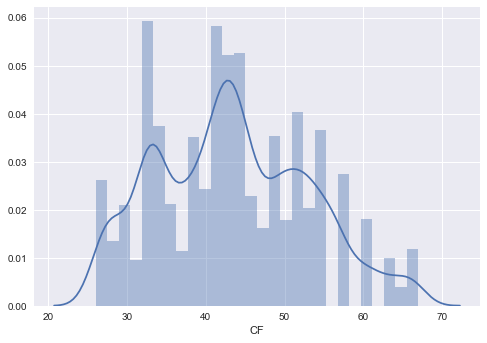

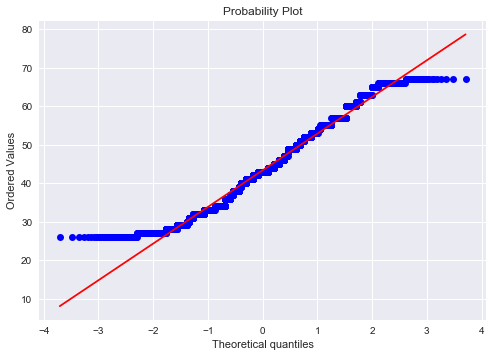

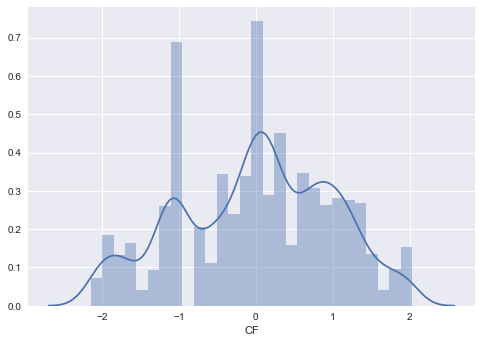

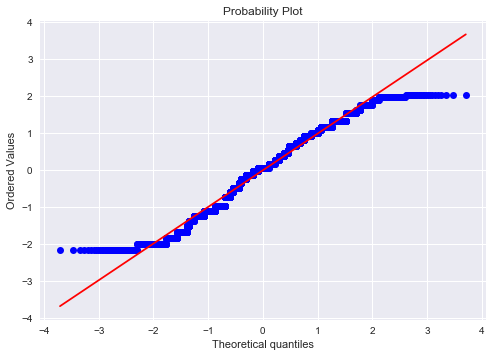

In [65]:
#CF
var = 'CF'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

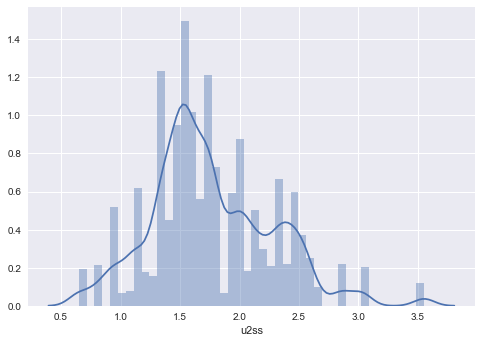

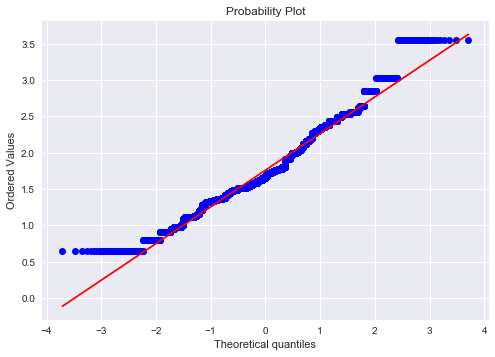

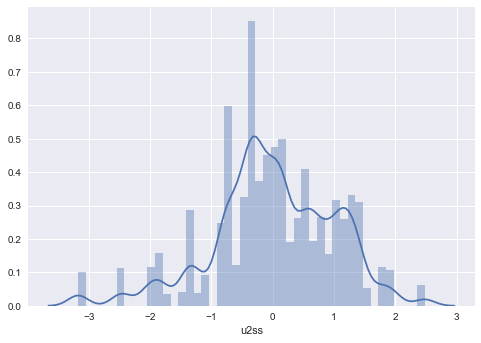

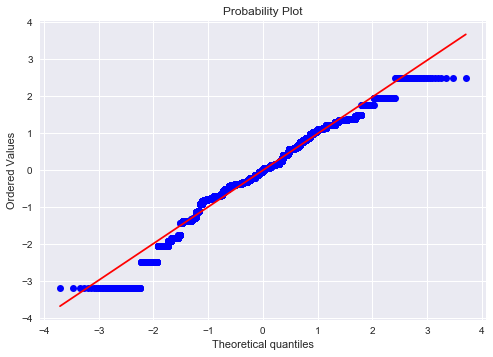

In [66]:
#u2ss
var = 'u2ss'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

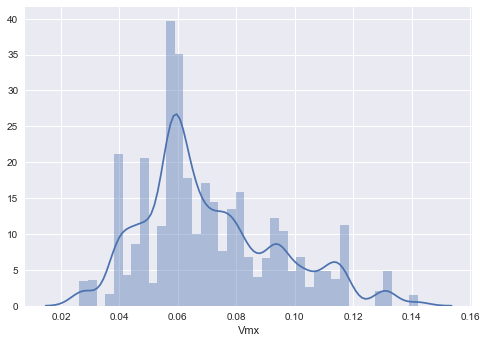

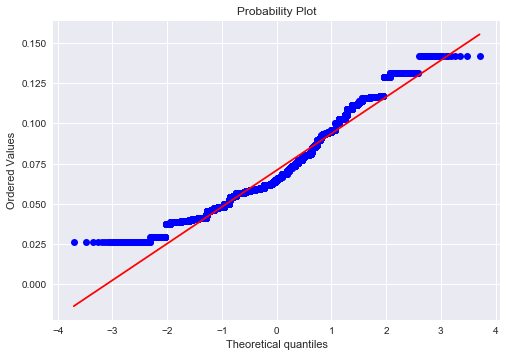

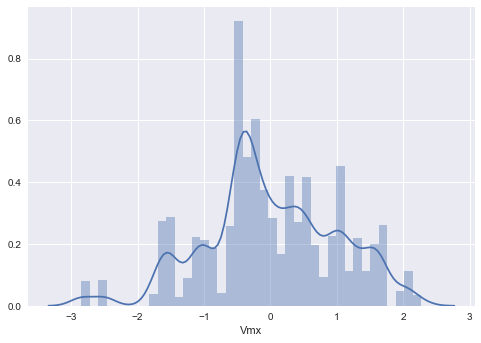

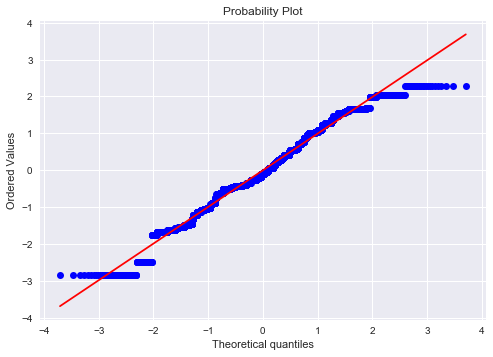

In [67]:
#Vmx
var = 'Vmx'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

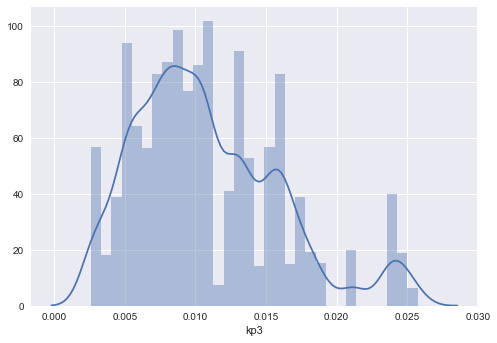

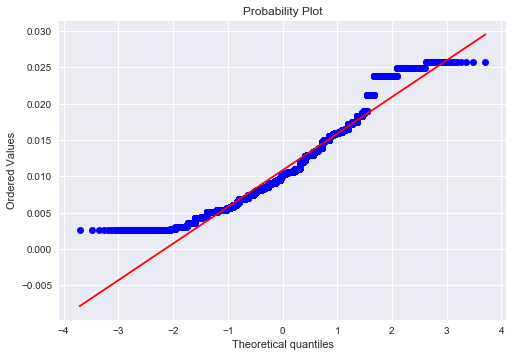

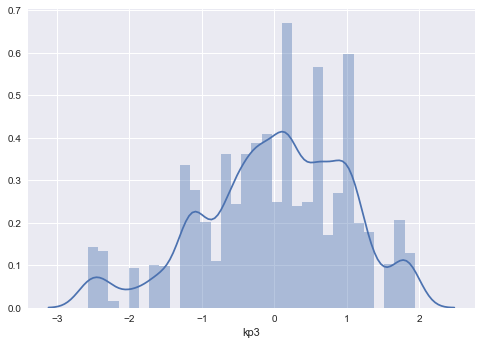

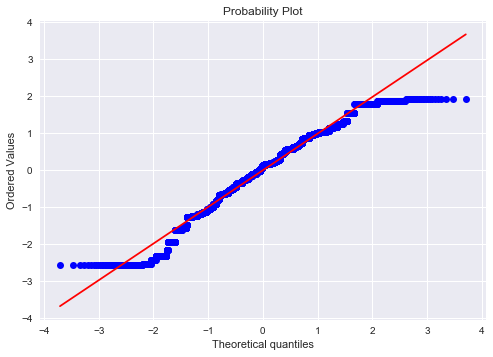

In [68]:
#kp3
var = 'kp3'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

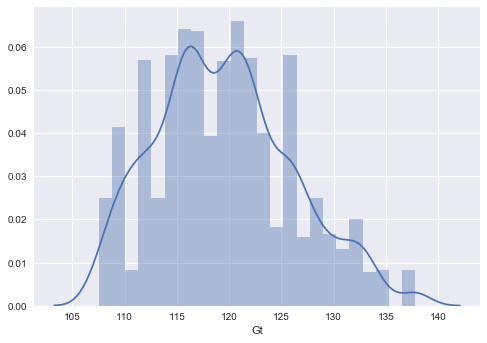

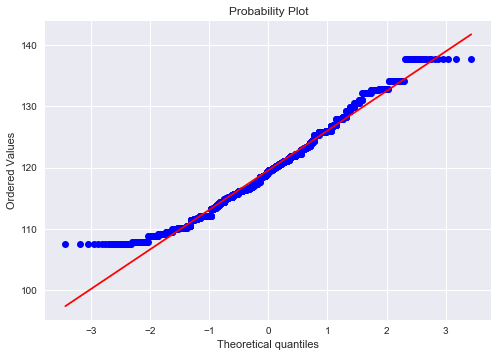

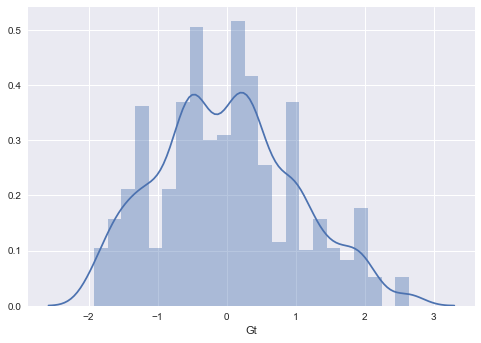

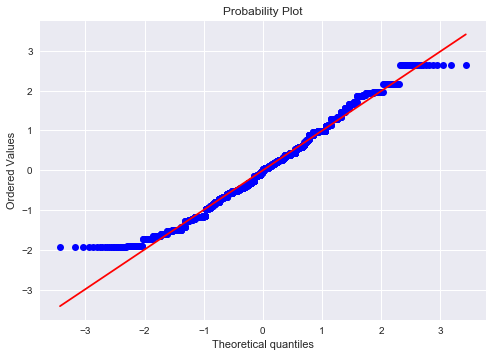

In [18]:
#Gt
var = 'Gt'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

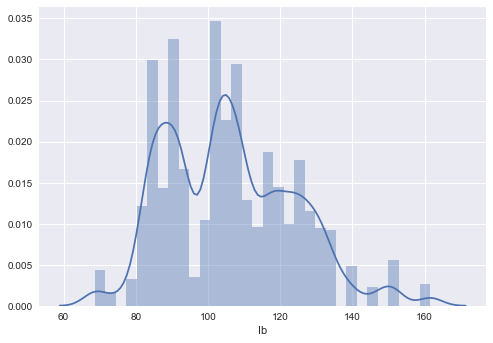

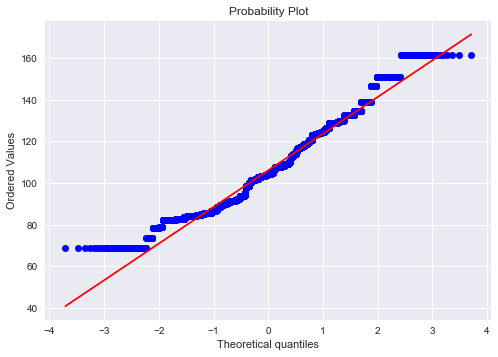

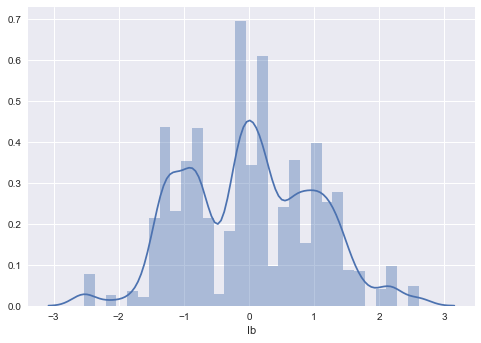

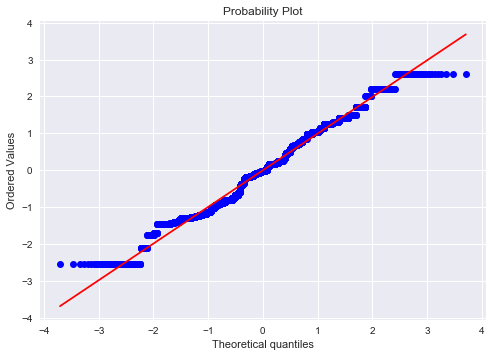

In [69]:
#Ib
var = 'Ib'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

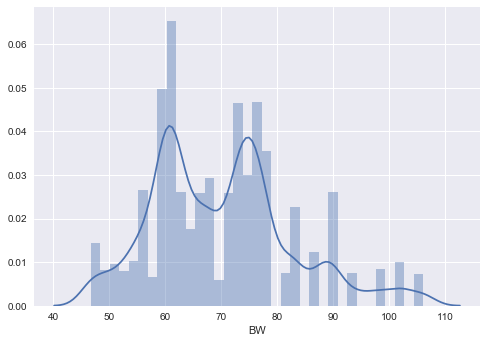

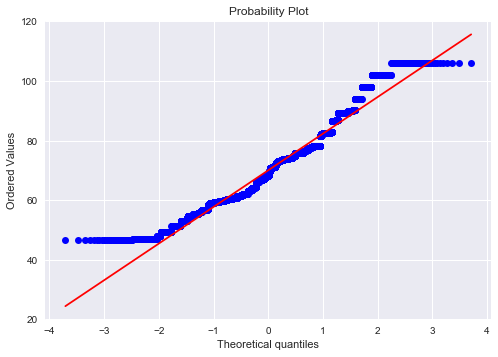

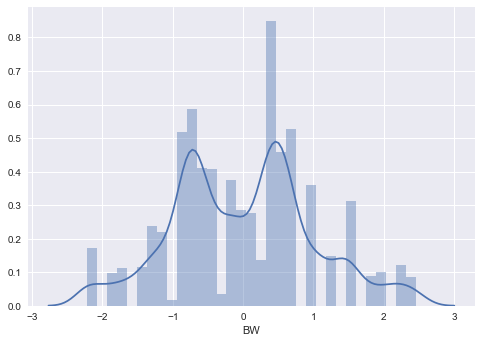

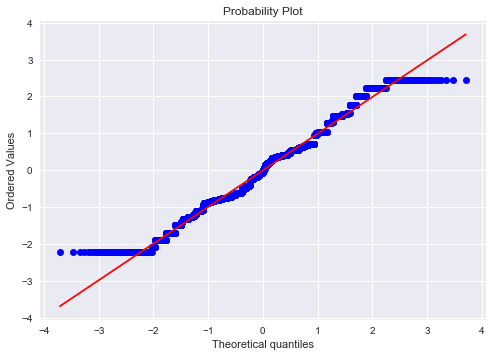

In [70]:
#BW 
var = 'BW'
sns.distplot(dataset[var])
plt.show()
res = stats.probplot(dataset[var], plot=plt)
plt.show()

#log-transformation and standard scaling
dataset_trans[var] = np.log(dataset[var])
scaler = StandardScaler().fit(dataset_trans[var].reshape(-1,1))
dataset_trans[var] = scaler.transform(dataset_trans[var].reshape(-1,1))
sns.distplot(dataset_trans[var])
plt.show()
res = stats.probplot(dataset_trans[var], plot=plt)
plt.show()

In [71]:
#ROC
var = 'ROC'
enc = LabelEncoder()
a = enc.fit_transform(np.asarray(dataset_trans[var]))
n = np.shape(enc.classes_)[0]
b = np.zeros([np.shape(a)[0],n])
for i in np.arange(np.shape(a)[0]):
    b[i,a[i]] = 1
    
columns = ["" for x in range(n)]
for i in np.arange(n):
    columns[i] = var + str(enc.classes_[i])
d = pd.DataFrame(data=b,columns=columns)
del dataset_trans[var]
dataset_trans = pd.concat([d, dataset_trans],axis=1)

In [72]:
#var_class
var = 'var_class'
enc = LabelEncoder()
a = enc.fit_transform(np.asarray(dataset_trans[var]))
n = np.shape(enc.classes_)[0]
b = np.zeros([np.shape(a)[0],n])
for i in np.arange(np.shape(a)[0]):
    b[i,a[i]] = 1
    
columns = ["" for x in range(n)]
for i in np.arange(n):
    columns[i] = var + str(enc.classes_[i])
d = pd.DataFrame(data=b,columns=columns)
del dataset_trans[var]
dataset_trans = pd.concat([d, dataset_trans],axis=1)

In [ ]:
#scatterplot
sns.set()
sns.pairplot(dataset_trans, size = 2.5)
plt.show();

In [ ]:
#correlation matrix
corrmat = dataset_trans.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [ ]:
#Target correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Y')['Y'].index
cm = np.corrcoef(dataset_trans[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [30]:
dataset_trans

,var_class1,var_class4,var_class5,var_class6,var_class7,ROC-2,ROC-1,ROC1,ROC2,G_c,min_risk,CR,CF,u2ss,Vmx,kp3,Gt,Ib,BW,Y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.003086,-0.724219,-0.939255,0.703325,-0.142312,-0.778155,0.160792,0.575951,0.083377,90
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.838816,0.367086,0.148202,-0.377239,0.003725,-0.286428,1.142868,0.214296,0.420162,90
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.122196,0.040469,0.039855,0.064605,1.437880,1.092596,-1.922954,-0.173284,-0.222051,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.021344,-0.320590,1.018966,0.526725,1.569870,0.280758,1.325976,-0.225919,-2.217111,90
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.060542,-0.724219,-1.222438,0.731913,-0.078926,-1.435269,0.025798,2.177880,0.407807,90
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.527620,-0.320590,-0.422446,0.230259,0.501800,0.213381,0.243142,1.040811,0.155654,0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.502310,-1.181817,-1.078562,1.348268,1.643383,-0.732168,-1.518356,0.340528,-0.881206,90
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.267528,-0.724219,-0.673246,0.956989,0.038015,-0.369248,0.113350,-0.181441,-0.664983,0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.137600,-0.724219,-1.222438,0.622160,-1.699792,0.064083,-0.484685,1.494613,0.563290,0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.946827,0.939562,0.653104,-0.989585,-0.077874,0.973800,-0.519543,-0.717414,0.708865,0


In [31]:
dataset_trans.to_csv('dataset_trans.csv',sep=',',index=False)